In [1]:
%matplotlib inline
#from bokeh.io import output_notebook
#rom bokeh.plotting import *
from matmodlab2 import *
from numpy import *
#output_notebook()
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import dill
import sys

Setting up the Matmodlab notebook environment


In [2]:
def align_pi_plane_with_axes_rot():
    """
    Returns a matrix that rotates the pi plane's normal to be the z axis
    i.e., a slice of pi plane becomes the xy plane after rotation
    """
    pi_vector = np.array([1, 1, 1]) / np.sqrt(3.)
    # wanted_vector = np.array([1, 0, 0])
    wanted_vector = np.array([0, 0, 1])
    wanted_vector = wanted_vector / np.linalg.norm(wanted_vector)
    added = (pi_vector + wanted_vector).reshape([-1, 1])
    # from Rodrigues' rotation formula, more info here: https://math.stackexchange.com/a/2672702
    rot_mat = 2 * (added @ added.T) / (added.T @ added) - np.eye(3)
    return rot_mat


def align_axes_with_pi_plane_rot():
    """
    Returns a matrix that undoes the align_pi_plane_with_axes_rot rotation
    """
    return np.linalg.inv(align_pi_plane_with_axes_rot())

align_axes_with_pi_plane_rot = align_axes_with_pi_plane_rot()
align_pi_plane_with_axes_rot = align_pi_plane_with_axes_rot()


full_sdv_column_names =  [
            # ADDED
            "TIME",
            "DTIME",
            "REAL_SXX",
            "REAL_SYY",
            "REAL_SZZ",
            "REAL_SXY",
            "REAL_SYZ",
            "REAL_SXZ",
            # BEGIN ACTUAL MAT SDVS
            "FICT_EP_XX",  # 0
            "FICT_EP_YY",  # 1
            "FICT_EP_ZZ",  # 2
            "FICT_EP_XY",  # 3
            "FICT_EP_YZ",  # 4
            "FICT_EP_XZ",  # 5
            "FICT_EQPS",   # 6
            "REAL_EP_XX",  # 7
            "REAL_EP_YY",  # 8
            "REAL_EP_ZZ",  # 9
            "REAL_EP_XY",  # 10
            "REAL_EP_YZ",  # 11
            "REAL_EP_XZ",  # 12
            "REAL_EQPS",   # 13
            "Y",           # 14
            "S.VM",        # 15
            # SDVS ABOVE HERE ARE HARD CODED, do not modify SDVs above this line
            "FICT_SXX",    
            "FICT_SYY",
            "FICT_SZZ",
            "FICT_SXY",
            "FICT_SYZ",
            "FICT_SXZ", 
            "TRIAL_STRESS_POST_TRANS_XX",
            "TRIAL_STRESS_POST_TRANS_YY",
            "TRIAL_STRESS_POST_TRANS_ZZ",
            "TRIAL_STRESS_POST_TRANS_XY",
            "TRIAL_STRESS_POST_TRANS_YZ",
            "TRIAL_STRESS_POST_TRANS_XZ",
            "MML_STRESS_GUESS_XX",    
            "MML_STRESS_GUESS_YY", 
            "MML_STRESS_GUESS_ZZ", 
            "MML_STRESS_GUESS_XY",    
            "MML_STRESS_GUESS_YZ", 
            "MML_STRESS_GUESS_XZ", 
            "TRIAL_STRESS_PRE_TRANS_XX",   
            "TRIAL_STRESS_PRE_TRANS_YY",   
            "TRIAL_STRESS_PRE_TRANS_ZZ",   
            "TRIAL_STRESS_PRE_TRANS_XY",   
            "TRIAL_STRESS_PRE_TRANS_YZ",   
            "TRIAL_STRESS_PRE_TRANS_XZ",   
            "CONV_STRESS_ISO_XX", 
            "CONV_STRESS_ISO_YY", 
            "CONV_STRESS_ISO_ZZ", 
            "CONV_STRESS_ISO_XY", 
            "CONV_STRESS_ISO_YZ", 
            "CONV_STRESS_ISO_XZ", 
            "FICT_EQPS_INPUT", 
            "DELTA_EXX", 
            "DELTA_EYY", 
            "DELTA_EZZ", 
            "DELTA_EXY", 
            "DELTA_EYZ", 
            "DELTA_EXZ", 
            'DELTA_SXX',
            'DELTA_SYY',
            'DELTA_SZZ',
            'DELTA_SXY',
            'DELTA_SYZ',
            'DELTA_SXZ',
        ]
column_reorder = [ 'TIME', 'DTIME',
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    "REAL_SXX",
                    "REAL_SYY",
                    "REAL_SZZ",
                    "REAL_SXY",
                    "REAL_SYZ",
                    "REAL_SXZ",
                    'S.VM',]
def run_ST_GPSR_TTM(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('ST_GPSR_TTM')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_CPA_alg(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('CPAPlasticitiy')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_generic_mps(mps1, property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def draw_principal_axes(ax, length_of_axes=2.5, scale=100):
    """
    Draws principal axes on graph, change length of axes and scale
    """
    zero_pos = np.zeros(2)
    straight_up_pos = np.array([0, 1]) * length_of_axes
    bottom_right_pos = np.array([np.cos(-np.pi / 6.), np.sin(-np.pi / 6.)]) * length_of_axes
    bottom_left_pos = np.array([np.cos(7 * np.pi / 6.), np.sin(7 * np.pi / 6.)]) * length_of_axes

    ax.quiver(*zero_pos, *straight_up_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_2$", straight_up_pos + np.array([0.25, -0.3]) * scale)

    ax.quiver(*zero_pos, *bottom_right_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_1$", bottom_right_pos + np.array([-0.18, 0.45]) * scale)

    ax.quiver(*zero_pos, *bottom_left_pos, scale_units="xy", scale=1)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.1, -0.45]) * scale)
    ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.28, -0.4]) * scale)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([-0.18, -0.4]) * scale)


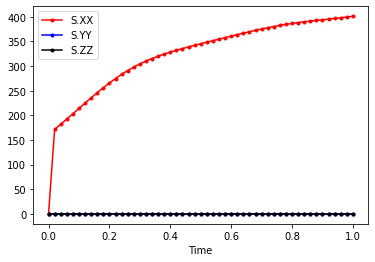

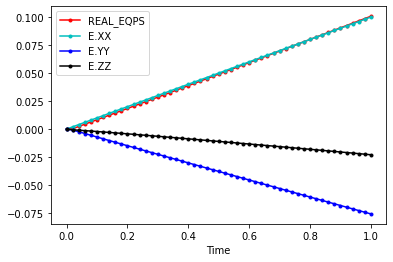

In [15]:
#""" Force deviatoric independence on a BINGO solution
def A_mapping(real_eqps):
    X_0 = real_eqps
    B_in = ((array([[-0.14230948,  0.69071245, -0.11118458],
       [-0.18437292,  1.15521409, -0.50697658],
       [ 0.09810738,  0.93261664, -0.53566132]])) * (X_0) + array([[-0.2876483 ,  0.50379515, -0.31387623],
       [-0.06844203,  0.00634169, -0.03918307],
       [ 0.08995488, -0.3724324 ,  0.17707248]])) @ ((array([[-0.14230948,  0.69071245, -0.11118458],
       [-0.18437292,  1.15521409, -0.50697658],
       [ 0.09810738,  0.93261664, -0.53566132]])) * (X_0) + array([[-0.2876483 ,  0.50379515, -0.31387623],
       [-0.06844203,  0.00634169, -0.03918307],
       [ 0.08995488, -0.3724324 ,  0.17707248]]))
    
    B_in = ((X_0) * (array([[ 0.4609263 ,  1.10732082, -1.64235896],
       [-5.78728213, -1.14002744, -7.41592524],
       [ 3.98790411,  2.2067136 ,  5.84326082]])) + array([[-0.03862302, -0.03187797,  0.20941924],
       [ 0.88568078,  0.49687034,  1.68504125],
       [-0.27601273, -0.15597089, -0.63898822]])) @ ((((X_0) * (array([[ 0.4609263 ,  1.10732082, -1.64235896],
       [-5.78728213, -1.14002744, -7.41592524],
       [ 3.98790411,  2.2067136 ,  5.84326082]])) + array([[-0.03862302, -0.03187797,  0.20941924],
       [ 0.88568078,  0.49687034,  1.68504125],
       [-0.27601273, -0.15597089, -0.63898822]])) @ (array([[ 0.70828347, -0.98725251,  0.28020231],
       [-1.25898614,  1.05867731,  0.20430282],
       [ 0.23715242,  0.0628872 , -0.30324894]]))) @ (((X_0) * (array([[ 0.4609263 ,  1.10732082, -1.64235896],
       [-5.78728213, -1.14002744, -7.41592524],
       [ 3.98790411,  2.2067136 ,  5.84326082]])) + array([[-0.03862302, -0.03187797,  0.20941924],
       [ 0.88568078,  0.49687034,  1.68504125],
       [-0.27601273, -0.15597089, -0.63898822]])) @ (array([[ 0.70828347, -0.98725251,  0.28020231],
       [-1.25898614,  1.05867731,  0.20430282],
       [ 0.23715242,  0.0628872 , -0.30324894]]))))
    B_in = align_axes_with_pi_plane_rot.T @ B_in @ align_axes_with_pi_plane_rot
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot @ B_in @ align_axes_with_pi_plane_rot.T
    new_B = np.zeros((6,6))
    new_B[0:3, 0:3] = B_in
    new_B[3:, 3:] = np.eye(3) # Like the stuffness matrix, the shear comps are multiplied by ROOT2

    return new_B
#"""

# Shared params
E = 10e4
nu = .333
# F_11 = 1.1
# all_comps = (F_11, 0, 0, 0, 1/np.sqrt(F_11), 0, 0,0, 1/np.sqrt(F_11))
# all_loads = 'FFFFFFFFF'
#all_comps = (0.07*np.sin(165*np.pi/180), 0.07*np.cos(165*np.pi/180), 0)
all_comps = (0.1, 0.0, 0.0)
all_loads = 'ESS'

all_frames = 50

# Run ST_GPSR_TTM model
pGPSR = {'E': E, 'Nu': nu,  "A_mapping": A_mapping}
mpsGPSR = run_ST_GPSR_TTM(pGPSR, frames=all_frames, components=all_comps, loads=all_loads)
# Run the included von mises model
# pHill = {'E': E, 'Nu': nu,  "F": 1.0, "G": 0.3, "H": 7.0}
# mpsH = MaterialPointSimulator('Hill')
# mpsH.material = Hill(**pHill)
# mpsH = run_generic_mps(mpsH, pHill, frames=all_frames, components=all_comps, loads=all_loads)

ax = mpsGPSR.plot('Time', 'S.XX', style='.r-')
mpsGPSR.plot('Time', 'S.YY', ax=ax, style='.b-')
mpsGPSR.plot('Time', 'S.ZZ', ax=ax, style='.k-')

# mpsH.plot('Time', 'S.XX', ax=ax, style='.m--')
# mpsH.plot('Time', 'S.YY', ax=ax, style='.c--')
# mpsH.plot('Time', 'S.ZZ', ax=ax, style='.y--')

ax2 = mpsGPSR.plot('Time', 'REAL_EQPS', style='.r-', )
ax2 = mpsGPSR.plot('Time', 'E.XX', style='.c-', ax=ax2)
ax2 = mpsGPSR.plot('Time', 'E.YY', style='.b-', ax=ax2)
ax2 = mpsGPSR.plot('Time', 'E.ZZ', style='.k-', ax=ax2 )
# mpsVM.plot('E.XX', 'EP_Equiv', ax=ax2, style='k--')


In [4]:
# Plot error plot
# For each results array, let' find the error between the predicted value and the analytical
def hill_YS(stress_vector, eqps, F=1., G=0.3, H=7.):
    analytical_Y = (13.6208515706149 + 69.9208533115855*eqps)
    sigma_1 = stress_vector[0]
    sigma_2 = stress_vector[1]
    sigma_3 = stress_vector[2]
    simulation_Y = np.sqrt(1./2.)*np.sqrt(F * (sigma_2 - sigma_3)**2 + G * (sigma_3 - sigma_1)**2 + H*(sigma_1 - sigma_2)**2 )

    error = np.abs((simulation_Y - analytical_Y)/analytical_Y)*100
    #print(simulation_Y, analytical_Y, eqps)
    return error, analytical_Y, simulation_Y


sv_all = mpsGPSR.df[['S.XX', 'S.YY', 'S.ZZ']].to_numpy()
h_eqps = mpsGPSR.df[['REAL_EQPS']].to_numpy()
error = []
analy = []
simul = []
for sv, eq in zip(sv_all, h_eqps):
    e, a, s = hill_YS(sv, eq)
    error.append(e)
    analy.append(a)
    simul.append(s)
error

[array([100.]),
 array([1357.94730055]),
 array([1374.46523987]),
 array([1390.71860491]),
 array([1407.07117454]),
 array([1423.51267662]),
 array([1439.99493581]),
 array([1456.62455982]),
 array([1473.31010578]),
 array([1490.14866027]),
 array([1506.76475871]),
 array([1523.47192654]),
 array([1540.48481389]),
 array([1557.2179927]),
 array([1573.91667345]),
 array([1590.80942859]),
 array([1607.56799513]),
 array([1624.00958623]),
 array([1640.78756667]),
 array([1657.20421573]),
 array([1673.69615087]),
 array([1690.52103575]),
 array([1706.85505563]),
 array([1722.3546812]),
 array([1739.69192941]),
 array([1754.32103794]),
 array([1770.67837619]),
 array([1786.01735372]),
 array([1801.8145566]),
 array([1817.46245919]),
 array([1831.87523023]),
 array([1846.40720615]),
 array([1861.88066208]),
 array([1876.79815242]),
 array([1890.65607654]),
 array([1904.70483529]),
 array([1918.96332551]),
 array([1931.62289073]),
 array([1945.8844612]),
 array([1958.45733826]),
 array([1971.

In [5]:
sv_all = mpsH.df[['S.XX', 'S.YY', 'S.ZZ']].to_numpy()
h_eqps = mpsH.df[['REAL_EQPS']].to_numpy()
error = []
analy = []
simul = []
for sv, eq in zip(sv_all, h_eqps):
    e, a, s = hill_YS(sv, eq)
    error.append(e)
    analy.append(a)
    simul.append(s)
error

NameError: name 'mpsH' is not defined